<a href="https://colab.research.google.com/github/ryanhuizar/Invasion-Analysis/blob/PyMT-GDC0941-Dose-Curve(s)/20201006PyMT_WT_GDC0941_doseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Reading in Data and Cleaning Up**

In [ ]:
#Load the data 
from google.colab import files 
#uploaded = files.upload()

df = pd.read_csv('2020_Organoid_log_main.csv')
df.head(7) #give first 7 rows of data 

#Notes about data: 
#Replicate needs to be switched to categorical variable.
#Several columns can be removed: special, file. 
#Need to make column to transform circularity into (1/circularity) 


Saving 2020_Organoid_log_main.csv to 2020_Organoid_log_main (1).csv


,Replicate,Date Imaged,Mouse_model,special,Matrix_comp,Condition,Concentration_1 (nM),Concentration_2,Organoid #,File,invasive_strands,disseminated_cells,Label,Area,Circularity
0,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,1.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-02.czi,2.0,3.0,invasive_collective,52283.178,0.185
1,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,2.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-03.czi,2.0,0.0,invasive_collective,30932.859,0.194
2,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,3.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-04.czi,2.0,5.0,invasive_collective,19352.437,0.330
3,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,4.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-05.czi,6.0,0.0,invasive_collective,83520.677,0.256
4,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,5.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-06.czi,0.0,4.0,noninvasive,33792.718,0.596
5,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,6.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-07.czi,5.0,5.0,invasive_collective,73916.702,0.328
6,1.0,8/18/20,PyMT,NaN,collagen_3mg,Wild-type,0.0,NaN,7.0,20200818_PyMT_PI3KmTOR_Inhibs_Wildtype-08.czi,1.0,0.0,invasive_collective,10933.217,0.479


In [ ]:
print('the shape of the data is ', df.shape) #400 entries, 15 columns. 
print(df.isna().sum()) #number of NaN values for each column


the shape of the data is  (400, 15)
Replicate                 3
Date Imaged               3
Mouse_model               3
special                 400
Matrix_comp               3
Condition                 3
Concentration_1 (nM)      3
Concentration_2         387
Organoid #                3
File                      3
invasive_strands          4
disseminated_cells        3
Label                     3
Area                      3
Circularity               3
dtype: int64


In [ ]:
#delete rows with concentration_1 and concentration_2
#need to delete these or the single drug in conc_1_will be registered during analysis. 
df2 = df.dropna(subset = ['Concentration_2'])
df1 = df.drop(df2.index) #drop rows where concentration 2 is NOT NaN
print(df1.isna().sum()) 

Replicate                 3
Date Imaged               3
Mouse_model               3
special                 387
Matrix_comp               3
Condition                 3
Concentration_1 (nM)      3
Concentration_2         387
Organoid #                3
File                      3
invasive_strands          4
disseminated_cells        3
Label                     3
Area                      3
Circularity               3
dtype: int64


In [ ]:
#Remove concentration_2, special, File columns

del df1['Concentration_2']
del df1['File']
del df1['special']


In [ ]:
#change data type of Replicate, Organoid # to categorical 

df1['Replicate'] = df1.loc[:, 'Replicate'].astype('category')
df1['Organoid #'] = df1.loc[:, 'Organoid #'].astype('category') #Note: SettingWithCopyWarning is not an Error
print(df1.dtypes) 

Replicate               category
Date Imaged               object
Mouse_model               object
Matrix_comp               object
Condition                 object
Concentration_1 (nM)     float64
Organoid #              category
invasive_strands         float64
disseminated_cells       float64
Label                     object
Area                     float64
Circularity              float64
dtype: object


In [ ]:
#Calculate new column, inverse circularity
df1['inverse_circularity'] = (1/df1['Circularity'])
df1.head()

,Replicate,Date Imaged,Mouse_model,Matrix_comp,Condition,Concentration_1 (nM),Organoid #,invasive_strands,disseminated_cells,Label,Area,Circularity,inverse_circularity
0,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,1.0,2.0,3.0,invasive_collective,52283.178,0.185,5.405405
1,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,2.0,2.0,0.0,invasive_collective,30932.859,0.194,5.154639
2,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,3.0,2.0,5.0,invasive_collective,19352.437,0.330,3.030303
3,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,4.0,6.0,0.0,invasive_collective,83520.677,0.256,3.906250
4,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,5.0,0.0,4.0,noninvasive,33792.718,0.596,1.677852


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


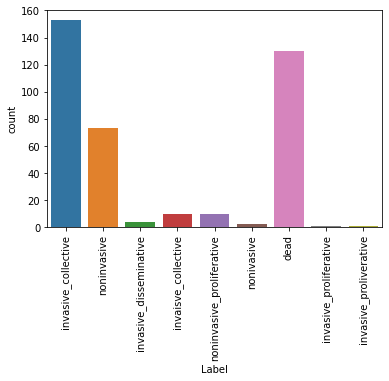

In [ ]:
#Plot distribution of invasive phenotypes among WT PyMT organoids
wild_type = df1[df1['Condition'] == 'Wild-type']
wild_type.head(10)

wt_label_plot = sns.countplot(df1['Label'], label = 'count')
for i in wt_label_plot.get_xticklabels():
  i.set_rotation(90)

print(wt_label_plot) #Obviously need to go through and rename so columns are not misspelled: 

In [ ]:
#Correct incorrect spellings in labels

df1 = df1.replace('invaisve_collective', 'invasive_collective')
df1 = df1.replace('nonivasive', 'noninvasive')
df1 = df1.replace(['invasive_proliferative', 'invasive_proliverative'], 'noninvasive_proliferative')



AxesSubplot(0.125,0.125;0.775x0.755)
(92, 13)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


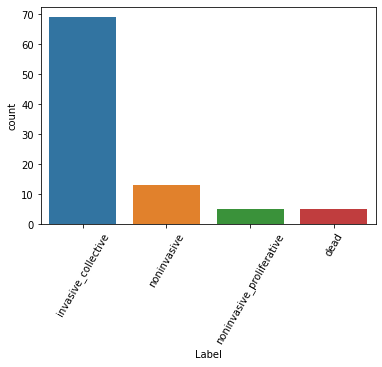

In [ ]:
#Plot distribution of invasive phenotypes among WT PyMT organoids Again
wild_type = df1[df1['Condition'] == 'Wild-type']
wild_type.head(10)

wild_type = wild_type[wild_type['Matrix_comp']== 'collagen_3mg'] #need to only sample the 3mg/ml matrices

wt_label_plot = sns.countplot(wild_type['Label'], label = 'count')
for i in wt_label_plot.get_xticklabels():
  i.set_rotation(60)

print(wt_label_plot)
print(wild_type.shape) #108x13

**Analysis of Wild-type organoid phenotypes**

-Analysis of distribution of measured parameters vs replicate number (i.e. how consistent are you being between experiments)

-Are there any factors that you might have to normalize for in future analysis -- i.e are larger organoids generally more invasive than non-invasive organoids? if so - invasiveness or number of invasive strands should be normalized to area, etc. 

(array([21., 23., 13.,  9.,  5., 10.,  1.,  1.,  6.,  3.]), array([  7943.505 ,  38456.9794,  68970.4538,  99483.9282, 129997.4026,
       160510.877 , 191024.3514, 221537.8258, 252051.3002, 282564.7746,
       313078.249 ]), <a list of 10 Patch objects>)


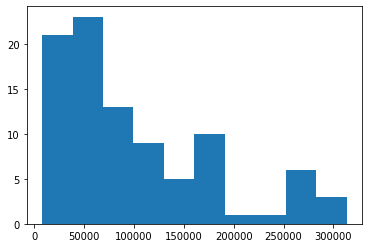

In [ ]:
#Plot histogram of area of wt organoids sampled: 
Area_hist_wt = plt.hist(wild_type['Area'])
print(Area_hist_wt)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


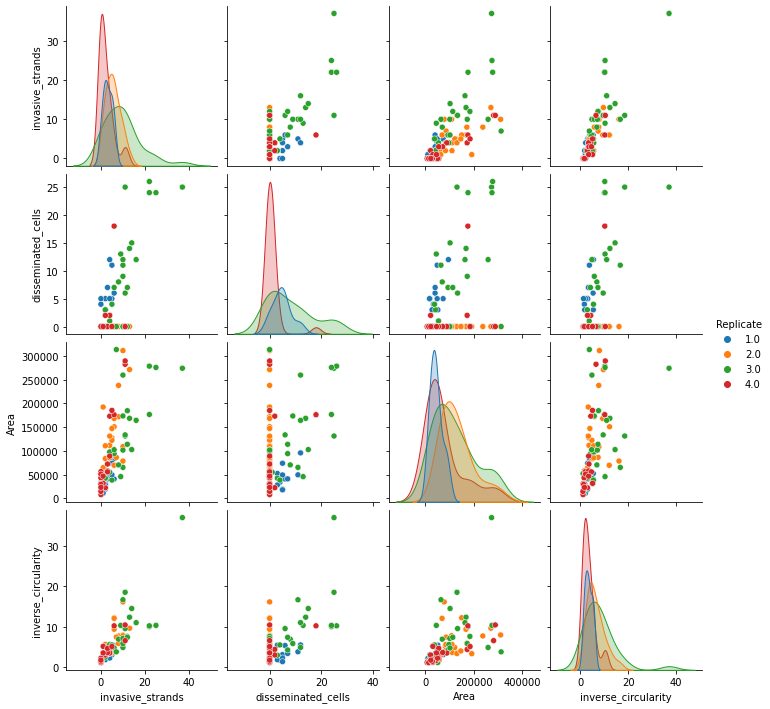

In [ ]:
#pairplot of variables in wt data: 
sns.pairplot(wild_type, 
             hue='Replicate', 
             vars=['invasive_strands', 'disseminated_cells', 'Area', 'inverse_circularity'])



AxesSubplot(0.125,0.125;0.62x0.755)


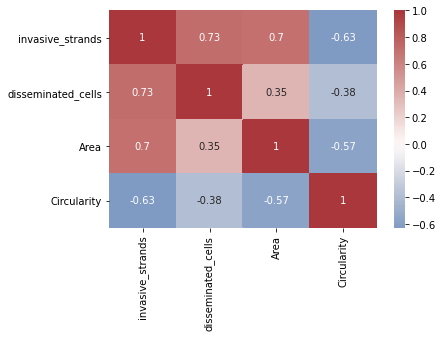

In [ ]:
#Correlation Matrix: 
wt_correlations = wild_type.iloc[:,7:12].corr()
wt_heatmap = sns.heatmap(wt_correlations, annot = True, center = 0, cmap = 'vlag')

print(wt_heatmap) #greatest correlations: {invasive strand:disseminated cells}, {invasive strand: Area}, {invasive strand:circularity}

**PI3K inhibition via GDC-0941- dose curve and phenotype analysis**
For each dose: 


*   Calculation of %dead organoids

For this problem, it might be helpful to separate data by replicate number, then create boxplot for %dead vs dose by experiment. 

From this, plus parameters already in data can be used to plot dose curves for GDC0941. Each should be fit with a sigmoidal curve (https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python)







In [ ]:
#Create summary data: 
#Subset data so that only 3mg/ml collagen experiments are present in df
df_col3mg = df1[df1['Matrix_comp'] == "collagen_3mg"]


#Create GDC dataframe with GDC0941 entries to append to wild_type dataframe
GDC = df_col3mg[df_col3mg['Condition']== 'GDC0941']
#Create a dataframe with wild-type and PI3K organoids
pi3k_i = pd.DataFrame() #Make an empty dataframe to append with subsets from df_col3mg
pi3k_i = pi3k_i.append(wild_type)
pi3k_i = pi3k_i.append(GDC)
pi3k_i.head(10)

,Replicate,Date Imaged,Mouse_model,Matrix_comp,Condition,Concentration_1 (nM),Organoid #,invasive_strands,disseminated_cells,Label,Area,Circularity,inverse_circularity
0,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,1.0,2.0,3.0,invasive_collective,52283.178,0.185,5.405405
1,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,2.0,2.0,0.0,invasive_collective,30932.859,0.194,5.154639
2,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,3.0,2.0,5.0,invasive_collective,19352.437,0.330,3.030303
3,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,4.0,6.0,0.0,invasive_collective,83520.677,0.256,3.906250
4,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,5.0,0.0,4.0,noninvasive,33792.718,0.596,1.677852
5,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,6.0,5.0,5.0,invasive_collective,73916.702,0.328,3.048780
6,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,7.0,1.0,0.0,invasive_collective,10933.217,0.479,2.087683
7,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,8.0,2.0,3.0,invasive_collective,28270.871,0.557,1.795332
8,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,9.0,6.0,6.0,invasive_collective,40793.448,0.188,5.319149
9,1.0,8/18/20,PyMT,collagen_3mg,Wild-type,0.0,10.0,4.0,5.0,invasive_collective,49314.077,0.450,2.222222


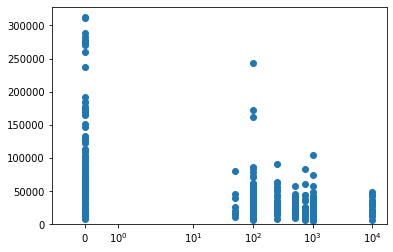

In [ ]:
#Plot dose vs inverse circularity, dose vs area, dose vs. disseminated_cells, dose vs. invasive_strands

#dose vs. area
pi3k_area_scatter = plt.scatter(pi3k_i['Concentration_1 (nM)'], pi3k_i['Area'])
plt.xscale('symlog') #use symlog to avoid error for including negative number in x axis. 
plt.ylim(ymin=0)
plt.xlim(xmin=-1)
print(pi3k_area_scatter) # Obviously this is not what we want -- need to convert dosage to categorical variable. 

In [ ]:
#Convert Concentration_1 into object type. 
pi3k_i['Dose'] = pi3k_i['Concentration_1 (nM)'].astype('object')

pi3k_i.dtypes

Replicate               category
Date Imaged               object
Mouse_model               object
Matrix_comp               object
Condition                 object
Concentration_1 (nM)     float64
Organoid #              category
invasive_strands         float64
disseminated_cells       float64
Label                     object
Area                     float64
Circularity              float64
inverse_circularity      float64
Dose                      object
dtype: object

Text(0, 0.5, 'Area (um^2)')

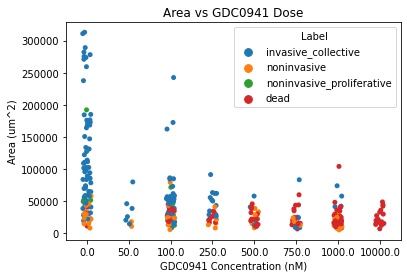

In [ ]:
#Create boxplot  for area vs dose curve. 
pi3k_area_dose = sns.stripplot(x = 'Dose', y = 'Area', data = pi3k_i, orient = 'v', hue = 'Label')
plt.title('Area vs GDC0941 Dose')
plt.xlabel('GDC0941 Concentration (nM)')
plt.ylabel('Area (um^2)')


Text(0, 0.5, 'Invasive Strands')

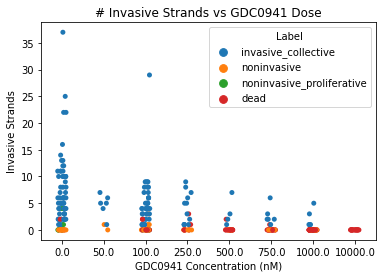

In [ ]:
#Create boxplot for invasive_strands vs dose
pi3k_IS_dose = sns.stripplot(x = 'Dose', y = 'invasive_strands', data = pi3k_i, orient = 'v', hue = 'Label')
plt.title('# Invasive Strands vs GDC0941 Dose')
plt.xlabel('GDC0941 Concentration (nM)')
plt.ylabel('Invasive Strands')

Text(0, 0.5, 'Peripheral Cells/Cell Clusters')

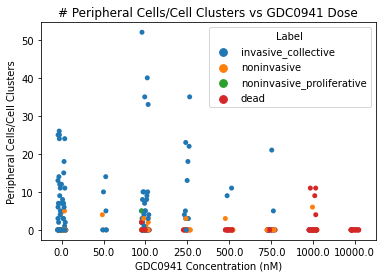

In [ ]:
#Creat plot for disseminated cells vs dose
pi3k_PeripheralCells_dose = sns.stripplot(x = 'Dose', y = 'disseminated_cells', data = pi3k_i, orient = 'v', hue = 'Label')
plt.title('# Peripheral Cells/Cell Clusters vs GDC0941 Dose')
plt.xlabel('GDC0941 Concentration (nM)')
plt.ylabel('Peripheral Cells/Cell Clusters')

Text(0, 0.5, 'inverse circularity')

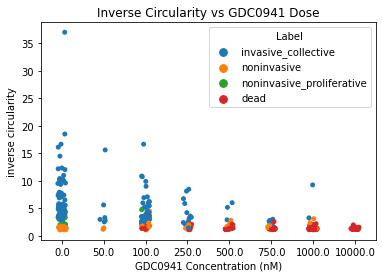

In [ ]:
#Create plot for inverse circularity vs dose
pi3k_inverseCircularity_dose = sns.stripplot(x = 'Dose', y = 'inverse_circularity', data = pi3k_i, orient = 'v', hue = 'Label')
plt.title('Inverse Circularity vs GDC0941 Dose')
plt.xlabel('GDC0941 Concentration (nM)')
plt.ylabel('inverse circularity')

In [ ]:
#Calculation of percent dead grouped by dose and replicate
pi3k_dose_rep= pi3k_i.groupby(['Dose', 'Label']).mean()
pi3k_dose_rep_count = pi3k_i.groupby(['Dose', 'Label']).size().reset_index(name='counts')

#append count column pi3k_dose_rep df
pi3k_dose_rep['count']=pi3k_dose_rep_count['counts'].values

#Calculate percentage of each
#first, convert count to object
#pi3k_dose_rep['Dose'] = pi3k_dose_rep['Dose'].astype('object')
pi3k_dose_rep['pct'] = pi3k_dose_rep['count']/pi3k_dose_rep.groupby('Dose')['count'].sum()

pi3k_dose_rep




Concentration_1 (nM)  ...       pct
Dose    Label                                            ...          
0.0     dead                                        0.0  ...  0.054348
        invasive_collective                         0.0  ...  0.750000
        noninvasive                                 0.0  ...  0.141304
        noninvasive_proliferative                   0.0  ...  0.054348
50.0    invasive_collective                        50.0  ...  0.750000
        noninvasive                                50.0  ...  0.250000
100.0   dead                                      100.0  ...  0.147059
        invasive_collective                       100.0  ...  0.617647
        noninvasive                               100.0  ...  0.191176
        noninvasive_proliferative                 100.0  ...  0.044118
250.0   dead                                      250.0  ...  0.346154
        invasive_collective                       250.0  ...  0.461538
        noninvasive                               250.0  ...  0.192308
500.0   dead                                      500.0  ...  0.592593
        invasive_collective                       500.0  ...  0.148148
        noninvasive                               500.0  ...  0.259259
750.0   dead                                      750.0  ...  0.678571
        invasive_collective                       750.0  ...  0.214286
        noninvasive                               750.0  ...  0.107143
1000.0  dead                                     1000.0  ...  0.666667
        invasive_collective                      1000.0  ...  0.092593
        noninvasive                              1000.0  ...  0.240741
10000.0 dead                                    10000.0  ...  1.000000

[23 rows x 8 columns]

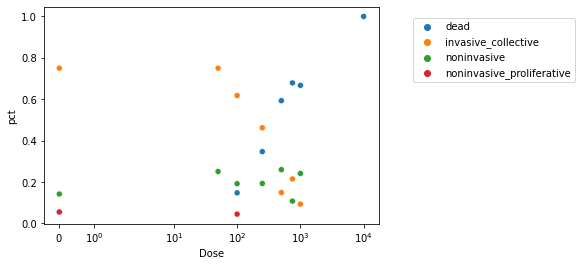

In [ ]:
#Plot percentage label by dose
pct_label = sns.scatterplot(x = 'Dose', y = 'pct', data = pi3k_dose_rep, hue = 'Label')
pct_label.set(xscale='symlog')
pct_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)


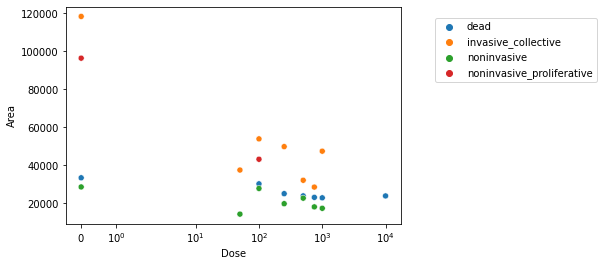

In [ ]:
#Assess Relationships between parameters in individual labels between treatments: 
area_label = sns.scatterplot(x = 'Dose', y = 'Area', data = pi3k_dose_rep, hue = 'Label')
area_label.set(xscale='symlog')
area_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)

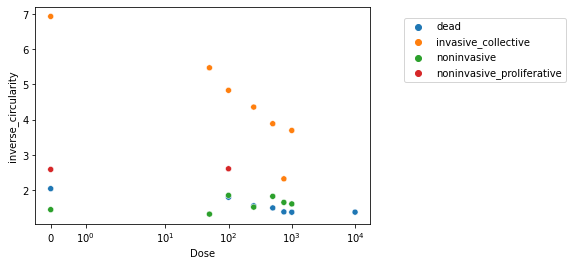

In [ ]:
invasiveness_label = sns.scatterplot(x = 'Dose', y = 'inverse_circularity', data = pi3k_dose_rep, hue = 'Label')
invasiveness_label.set(xscale='symlog')
invasiveness_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)

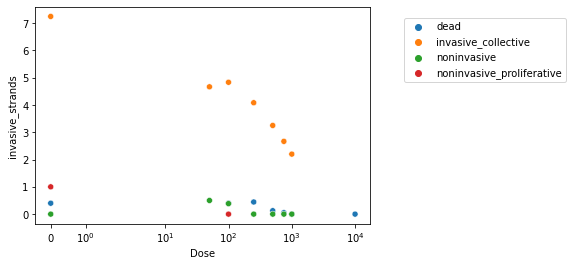

In [ ]:
IS_label = sns.scatterplot(x = 'Dose', y = 'invasive_strands', data = pi3k_dose_rep, hue = 'Label')
IS_label.set(xscale='symlog')
IS_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)

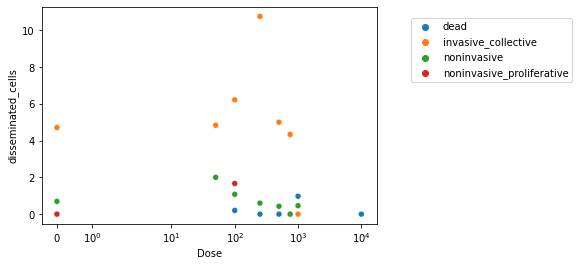

In [ ]:
DC_label = sns.scatterplot(x = 'Dose', y = 'disseminated_cells', data = pi3k_dose_rep, hue = 'Label')
DC_label.set(xscale='symlog')
DC_label.legend(loc='right', bbox_to_anchor=(1.6, 0.8), ncol=1)